# Blackjack

## Exercise 5.1

To understand the shape of the state-value function, we have to understand that this is the state-value function for a specific policy, sticking on 20 or 21 and hitting otherwise, playing against another specific policy (which can be thought of as the environment dynamics), the dealer sticks on 17 or greater and hits otherwise. Now for the questions.

1. Why does the estimated value function jump up for the last two rows in the rear?

These rows correspond to our state being 20 or 21, regardless of what the dealer shows. These are the only states where we will stick, and thus will not bust, whereas any other state has a non-zero chance of busting.

2. Why does it drop off for the whole last row on the left? 

This row corresponds to the dealer showing an ace, which has two advantages for the dealer. The first reason is that since an ace can count as an 11, the dealer has a high chance of hitting exactly 21 by drawing any 10 or face card. The second reason is the flexibility of an ace also being able to count as a 1 or an 11, meaning that in some sense the dealer can actually bust once when the ace counts as an 11, switch to counting it as a 1, and then get another chance of hitting to a value of 17 or greater. Since these are advantages to the dealer and this is a zero sum game, these are also disadvantages to the player, hence the drop-off in our state-value function/expected reward if the dealer is showing an ace.

3. Why are the frontmost values higher in the upper diagrams than in the lower?

The upper diagrams correspond to the player having a "usable ace", i.e. an ace that's currently being counted as an 11 but could be switched to being counted as a 1. Thus the same advantages described above are also true for the player in this case. In particular, having a usable ace and being at a current sum of 12 is better than being at a current sum of 12 without a usable ace since we have that extra buffer of essentially having a "free" bust, and thus a higher chance of actually hitting 20 or 21.

## Exercise 5.2

Q. Suppose every-visit MC was used instead of first-visit MC on the blackjack task. Would you expect the results to be very different? Why or why not? 

I wouldn't expect the results to be different for the blackjack task, since the difference between first-visit and every-visit MC is whether or not you update the expected reward for a given state on the first visit or on every visit **within** a single episode. 

In the blackjack task, it's very unlikely revisit the same state within a single episode. To see why, consider the three variables that can change: our current sum, whether or not we have a usable ace, and what the dealer is showing. Both our current sum and the dealer's current sums are strictly increasing on every action, with the exception of cases where we switch from a usable ace to a non-usable ace. Switching from having a usable ace to a non-usable ace is also non-reversible, with the exception of drawing another ace. The only way to revisit a state within the same episode is to draw multiple aces, for example:
```
Drawn card: A  ,  4  ,  9   ,  A 
State:     11/U, 15/U, 14/N , 15/U  
```
where the state is expressed as {current sum}/{U = usable ace, N = no usable ace}.

Thus I believe that switching to every-visit MC would have little effect on the estimated state-value function or the number of episodes it takes to achieve convergence.

# Exercise 5.3

The backup diagram for Monte Carlo estimation of action-values looks very similar to the backup diagram presented on pg 95, but rather starting from a black-dot instead of a white circle, i.e. the root is a state-action pair rather than just a state, and we're still sampling a full trajectory before updating. 

# Exercise 5.4

To simplify the code and use an online calculation of the average return for each state-action pair, we can just plug in the online formula for the mean, derived as follows:

$\overline{x}_n = \frac{1}{n}\sum_{i=0}^n x_i$  
$ = \frac{1}{n}[x_n + (n-1)\frac{1}{n-1}\sum_{i=0}^{n-1} x_i]$  
$ = \frac{1}{n}[x_n + (n-1)\overline{x}_{n-1}]$  
$ = \overline{x}_{n-1} + \frac{1}{n}(x_n - \overline{x}_{n-1})$  

Thus we can define a lookup table $N(s, a)$ that counts the number of times we've observed the state-action pair $(s, a)$, update the initialization to initialize $N(s, a)$ to 0 for all state-action pairs, and then change the last three lines of the pseudocode to read:  
$N(S_{t+1}, A_{t+1}) \leftarrow N(S_t, A_t) + 1$  
$Q(S_{t+1}, A_{t+1}) \leftarrow Q(S_t, A_t) + \frac{1}{N(S_t, A_t)}(G - Q(S_t, A_t))$  

with the argmax policy update remaining the same.

# Exercise 5.5

Q. Consider an MDP with a single nonterminal state and a single action that transitions back to the nonterminal state with probability $p$ and transitions to the terminal state with probability $1-p$. Let the reward be +1 on all transitions, and let $\gamma = 1$. Suppose you observe one episode that lasts 10 steps, with a return of 10. 

What are the first-visit and every-visit estimators of the value of the nonterminal state?

To answer this question, we have to look at how the total rewards are calculated at each time-step for the Monte Carlo estimation process. In particular, for each time-step $t$, we have:

For each step of episode, $t = T-1, T-2, ... 0$:  
$G \leftarrow \gamma G + R_{t+1}$

So since we have $\gamma = 1$, we can see that the rewards simply accumulate as we step backwards. 

For first-visit estimation, we would go all the way back to $t = 0$ to update our value estimate of the non-terminal state, at which point we'd have $G = 10$, giving an estimate of 10 for the value of the non-terminal state.

For every-visit estimation, we would instead be averaging the expected return at each visit. Since the expected return is increasing by 1 at each iteration as we go backwards in time through the episode, and the number of visits is increasing, we'd expect our final estimate to be:  
$V(s) = \frac{1}{10}\sum_{i=1}^{10} i = \frac{1}{10} \frac{10(10+1)}{2} = \frac{11}{2} = 5.5$

# Exercise 5.6

Q. What is the equation analogous to (5.6) for action values $Q(s, a)$ instead of state values $V(s)$, again given returns generated using $b$?

While I'm not totally sure, I think the main difference here is that we need to define our weighted averaging over state-action pairs instead of just states. To do this, we similary define $\tau(s, a)$ to be the set of all time-steps at which the state-action pair $(s, a)$ was visited, and $T(t)$ to be the first end-of-episode after time-step $t$. Then we can similary write a weighted importance-sampling for $Q(s, a)$ as:

$Q(s, a) = \dfrac{\sum_{t\in\tau(s, a)}\rho_{t:T(t)-1}G_t}{\sum_{t\in\tau(s, a)}\rho_{t:T(t)-1}}$ 

# Exercise 5.7

Q. In learning curves such as those shown in Figure 5.3 error generally decreases with training, as indeed happened for the ordinary importance-sampling method. But for the weighted importance-sampling method error first and then decreased. Why do you think this happened?

I believe this comes down to the fact that while weighted importance-sampling has lower variance than ordinary importance-sampling, it's statistically biased towards the value-function of the behavior policy. Since the behavior policy and the target policy are very different in this case, we'd expect the error to increase while weighted importance-sampling is converging towards the value-function of the behavior policy. However, with enough samples, the bias of weighted importance-sampling begins approaches zero, hence we see that the error decreases once our bias begins decreasing.

# Exercise 5.8

Q. The results with Example 5.5 and shown in Figure 5.4 used a first-visit MC method. Suppose that instead an every-visit MC method was used on the same problem. Would the variance of the estimator still be infinite? Why or why not? 

The proof for the variance of the estimator being infinite under first-visit MC with ordinary importance sampling relied only on the episode returns, the episode probabilitites, and the squared importance ratios for all episode lengths. If we were to use every-visit MC instead of first-visit MC, we wouldn't expect any part of this calculation to change. The episode probabilities and importance ratios remain the same since the behavior and target policies are the same, and the episode returns are also unchanged. Thus we would expect the variance of the estimator to still be infinite.

# Exercise 5.9

Q. Modify the algorithm for first-visit MC policy evaluation (Section 5.1) to
use the incremental implementation for sample averages described in Section 2.4.

I think this looks largely like the answer to exercise 5.4, but using state-value functions instead of action-value functions, i.e. we change the last two lines of the pseudocode to look like:

$N(S_t) \leftarrow N(S_t) + 1$  
$V(S_t) \leftarrow V(S_t) + \frac{1}{N(S_t)}(G - V(S_t))$  
where $N(S_t)$ is initialized to zero for all states and indicates the number of times the $V(S_t)$ has been updated.


# Exercise 5.10

Q. Derive the weighted-average update rule (5.8) from (5.7). Follow the pattern of the derivation of the unweighted rule (2.3).

We have the expression for the value function estimate at step $n$ as a weighted average of observed returns:  
$V_{n+1} = \frac{\sum_{k=1}^{n}W_k G_k}{\sum_{k=1}^{n}W_k}$  

For ease of notation, we also define the cumulative sum of returns $C_n = \sum_{k=1}^{n}W_k$. We can then derive the weighted-average update rule as follows:

$V_{n+1} = \frac{W_n G_n}{C_n} + \frac{\sum_{k=1}^{n-1}W_k G_k}{C_n}$ (Split out the weighted return from the current time step)  
$= \frac{1}{C_n}[W_n G_n + \sum_{k=1}^{n-1}W_k G_k$ ]  
$= \frac{1}{C_n}[W_n G_n + \frac{\sum_{k=1}^{n-1}W_k G_k}{C_n} \frac{C_{n-1}}{C_{n-1}} ]$ (Multiply by $\frac{C_{n-1}}{C_{n-1}} = 1$)  
$= \frac{1}{C_n}[W_n G_n + V_n C_{n-1} ]$ (Simplify $\frac{\sum_{k=1}^{n-1}W_k G_k}{C_{n-1}} = V_n$)  
$= \frac{W_n G_n}{C_n} + V_n \frac{C_{n-1}}{C_n}$  
$= \frac{W_n G_n}{C_n} + V_n \frac{C_n - W_n}{C_n}$ (Rewrite $C_{n-1} = C_n - W_n$ by definition)  
$= \frac{W_n G_n}{C_n} + V_n (1 - \frac{W_n}{C_n})$  
$= V_n + \frac{W_n}{C_n}G_n - \frac{W_n}{C_n}V_n$  
$V_{n+1} = V_n + \frac{W_n}{C_n}[G_n - V_n]$  

# Exercise 5.11

Q. In the boxed algorithm for off-policy MC control, you may have been expecting the $W$ update to have involved the importance-sampling ratio $\frac{\pi(A_t|S_t)}{b(A_t|S_t)}$, but instead it involves $\frac{1}{b(A_t|S_t)}$. Why is this nevertheless correct?

Since we are only considering greedy policies $\pi$, the probability for a given action $A_t$ from state $S_t$ is always either 1 or 0. 

In the case where $A_t \neq \pi(S_t)$, then our importance-sampling ratio is zero, and thus we can skip the rest of the episode since we know the updates from all further time-steps will be zero. This is handled in the "exit inner loop" statement in the pseudocode.

In the case where $A_t = \pi(S_t)$, then the probability of $A_t$ under $\pi$ is simply 1, and thus we can just write the importance-sampling ratio as $\frac{1}{b(A_t|S_t)} = \frac{\pi(A_t|S_t)}{b(A_t|S_t)}$.

# Exercise 5.12

In [80]:
import random

from collections import namedtuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import trange
from scipy.stats import norm

In [4]:
class TrackGenerator():
    pass

class Straightaway(TrackGenerator):
    def __init__(self, avg_width=10, std_dev=1):
        self.avg_width = avg_width
        self.dist = norm(loc=avg_width, scale=std_dev)
    
    def generateTrack(self, length, initial_width, seed=42):
        curr_width = initial_width
        widths = []
        for i in range(length):
            p_decrease = self.dist.cdf(curr_width - 0.5)
            p_increase = self.dist.sf(curr_width + 0.5)
            
            r = np.random.random()
            incr = 0
            if r < p_decrease:
                incr = -1
            elif r < p_decrease + p_increase:
                incr = 1
            curr_width += incr
            widths.append(curr_width)
        return widths
                
        

In [5]:
np.random.seed(42)
before_turn_len = 20
turn_len = 10
after_turn_len = 10
avg_width = 20
stop_prob = 0.1

mat = np.zeros((avg_width*3, before_turn_len+turn_len+after_turn_len+1))

before_turn = Straightaway(avg_width=avg_width, std_dev=5)
turn = Straightaway(avg_width=avg_width, std_dev=5)
after_turn = Straightaway(avg_width=2*avg_width, std_dev=10)

before_turn_widths = before_turn.generateTrack(before_turn_len, avg_width)
turn_widths = turn.generateTrack(turn_len, before_turn_widths[-1])
after_turn_widths = after_turn.generateTrack(after_turn_len, 2*avg_width)


curr_x = 0
curr_y = 0

# Starting line
mat[curr_x:curr_x+avg_width, 0] = 1

# Initial straightaway
for w in before_turn_widths:
    curr_y += 1
    mat[curr_x:curr_x+w, curr_y] = 1

# Corner
for w in turn_widths:
    curr_x += 1
    curr_y += 1
    mat[curr_x:curr_x+w, curr_y] = 1
    
# Final straightaway
end_x = curr_x + 2*avg_width
for w in after_turn_widths:
    curr_y += 1
    mat[end_x-w:end_x-1, curr_y] = 1
    mat[end_x-1, curr_y] = 2




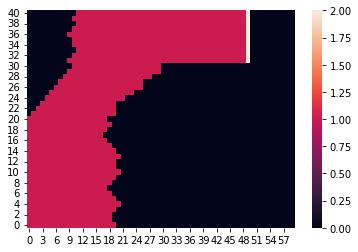

In [6]:
ax = sns.heatmap(mat.T)
ax.invert_yaxis()


In [19]:
test = np.zeros((4, 3, 3, 3))

In [20]:
test[(2,1)]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [58]:
np.finfo(float).min

-1.7976931348623157e+308

In [21]:
np.random.choice()np.argmax(test[(2, 1)])

0

In [22]:
idx = np.unravel_index(np.argmax(test[(2,1)]), test.shape[2:])
idx

(0, 0)

In [118]:
from enum import Enum

State = namedtuple("State", ["x", "y", "vx", "vy"])

class Action(Enum):
    DEC = 0
    NC = 1
    INC = 2


def legalMove(vx, vy, dx, dy):
    """Check if a move is legal.
    
    We disallow any moves that would change either velocity component
    to be outside of [0, max_v), or any move that would make both
    velocity components zero.
    """
    new_vx = vx + dx - 1
    new_vy = vy + dy - 1
    if new_vx < 0 or new_vx >= max_v or new_vy < 0 or new_vy >= max_v:
        return False
    if new_vx == 0 and new_vy == 0:
        return False
    return True
    
    
    
def initQ(max_x, max_y, num_actions):
    Q = np.empty((max_x, max_y, max_v+1, max_v+1, num_actions, num_actions))
    min_float = np.finfo(float).min
    
    
    it = np.nditer(Q, flags=["multi_index"], op_flags=["writeonly"])
    for val in it:
        x, y, vx, vy, dx, dy = it.multi_index
        if legalMove(vx, vy, dx, dy):
            val[...] = min_float
        else:
            val[...] = np.NINF
    return Q
    
def getAction(Q, state, eps=1e-2):
    action_values = Q[state]
    if np.random.random() < eps:
        action = tuple(np.random.randint(num_actions, size=2))
        while np.isinf(action_values[action]):
            action = tuple(np.random.randint(num_actions, size=2))
    else:
        # Break argmax ties randomly, pretty important for getting episodes
        # to end in a reasonable amount of time in early stages where few
        # rewards have propagated back and thus many Q entries are zero.
        idx = np.random.choice(np.flatnonzero(action_values == action_values.max()))
        action = np.unravel_index(idx, action_values.shape)
    return action
            
        
    
class Car():
    def __init__(self, maxv):
        self.vx = 0
        self.vy = 0
        self.maxv = maxv
        
        
    def changeV(self, dx, dy):
        self.vx += dx - 1
        self.vy += dy - 1
        assert self.vx >= 0
        assert self.vy >= 0
        assert self.vx <= self.maxv
        assert self.vy <= self.maxv
        
    def reset(self):
        self.vx = 0
        self.vy = 0
        
    

def runEpisode(track, Q, stop_prob=0.1):
    car = Car(4)
    max_x, max_y = track.shape
    
    # Start at random position on the starting line.
    init_x = np.random.randint(0, avg_width)
    state = State(init_x, 0, 0, 0)
    
    episode = []
    step = 0
    while True:
        action = getAction(Q, state)
        episode.append((state, action))
        
        car.changeV(*action)
        if np.random.random() < stop_prob:
            car.reset()
        next_x = state.x + car.vx
        next_y = state.y + car.vy
        
        if next_x < 0 or next_x >= max_x or next_y < 0 or next_y >= max_y or track[(next_x, next_y)] == 0:
            next_x = np.random.randint(0, avg_width)
            next_y = 0
            car.reset()
        if track[(next_x, next_y)] == 2:
            break
        
        state = State(next_x, next_y, car.vx, car.vy)
        step += 1
        if step % 1e6 == 0:
            print(f"step: {step}")
    return episode

def updateQ(Q, N, episode, gamma=0.9):
    G = 0
    for step in reversed(episode):
        # All rewards are -1
        G = gamma * G - 1
        state, action = step
        q = Q[state][action]
        n = N[state][action] + 1
        
        N[state][action] = n
        Q[state][action] = ((n-1) * q + G) / n

def monteCarloControl(track, num_episodes=1000):
    max_v = 4
    max_x, max_y = mat.shape
    num_actions = 3
    actions = [-1, 0, 1]

    Q = initQ(max_x, max_y, num_actions)
    N = np.zeros_like(Q)
    
    episode_lengths = []
    for i in trange(num_episodes):
        episode = runEpisode(track, Q)
        updateQ(Q, N, episode)
        episode_lengths.append(len(episode))
    return Q, episode_lengths


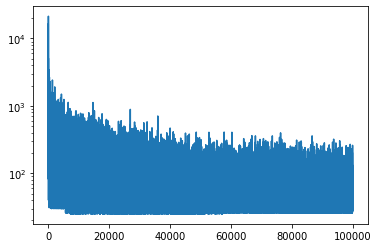

In [106]:
plt.plot(np.arange(len(eps_length)), eps_length)
plt.yscale("log")

In [116]:
cumsum = np.cumsum(eps_length)

w = 100
avgs = [(cumsum[i] - cumsum[i-w]) / w for i in range(10, len(eps_length))]

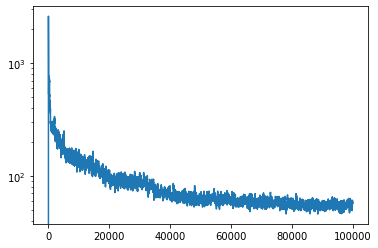

In [117]:
plt.plot(np.arange(len(avgs)), avgs)
plt.yscale("log")

In [119]:
example_trajectory = runEpisode(mat, Q, stop_prob=0)

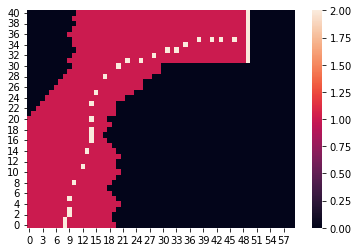

In [124]:
example_mat = mat.copy()
for state in example_trajectory:
    example_mat[state[0].x, state[0].y] = 2
    
ax = sns.heatmap(example_mat.T)
ax.invert_yaxis()


In [125]:
example_trajectory = runEpisode(mat, Q, stop_prob=0)

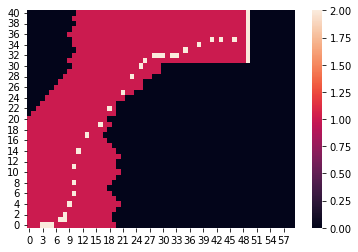

In [126]:
example_mat = mat.copy()
for state in example_trajectory:
    example_mat[state[0].x, state[0].y] = 2
    
ax = sns.heatmap(example_mat.T)
ax.invert_yaxis()
